# **Life cycle of Machine learning Project**
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model


# **Problem statement**

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [112]:
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
Total_score,0
Average_score,0


In [ ]:
df.duplicated().sum()

0

Thus there are no missing values and duplicate values in our dataset

In [ ]:
cols=df.columns
for c in cols:
  print(c,df[c].unique())
  print("-"*70)

gender ['female' 'male']
----------------------------------------------------------------------
race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------
parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------
lunch ['standard' 'free/reduced']
----------------------------------------------------------------------
test_preparation_course ['none' 'completed']
----------------------------------------------------------------------
math_score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23 

In [ ]:
# checking statistic for the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **insights**
* means are very close to each other i.e 66.08 to 68.05
* standard deviation is also very close i.e 14.6 to 15.19
* there are students with very low marks i.e 0(in math) and 100

# **Exploring the data**

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# seperate numerical and categorical columns
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(exclude=np.number).columns

print(num_cols)
print(cat_cols)

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [ ]:
for col in cat_cols:
  print(df[col].unique())
  print("-"*70)

['female' 'male']
----------------------------------------------------------------------
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------
['standard' 'free/reduced']
----------------------------------------------------------------------
['none' 'completed']
----------------------------------------------------------------------


In [ ]:
# total and average scores columns
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
m_full=df[df['math_score']==100]['Total_score'].count()
r_full=df[df['reading_score']==100]['reading_score'].count()
w_full=df[df['writing_score']==100]['writing_score'].count()

print(f"Number of students who scored full marks in math: {m_full}")
print(f"Number of students who scored full marks in reading: {r_full}")
print(f"Number of students who scored full marks in writing: {w_full}")

Number of students who scored full marks in math: 7
Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14


In [ ]:
# set a threshold as per your choice
threshold=25

m_min=df[df['math_score']<=threshold]['Total_score'].count()
r_min=df[df['reading_score']<=threshold]['reading_score'].count()
w_min=df[df['writing_score']<=threshold]['writing_score'].count()

print(f"Number of students who scored less than {threshold} in math: {m_min}")
print(f"Number of students who scored less than {threshold} in reading: {r_min}")
print(f"Number of students who scored less than {threshold} in writing: {w_min}")

Number of students who scored less than 25 in math: 7
Number of students who scored less than 25 in reading: 4
Number of students who scored less than 25 in writing: 5


# **Insights**
* Reading subject appeares to be easy and scoring for students
* Math appears to be a tough subject for students
* Writing is on an average moderate subject for the students

# **Visualization part**

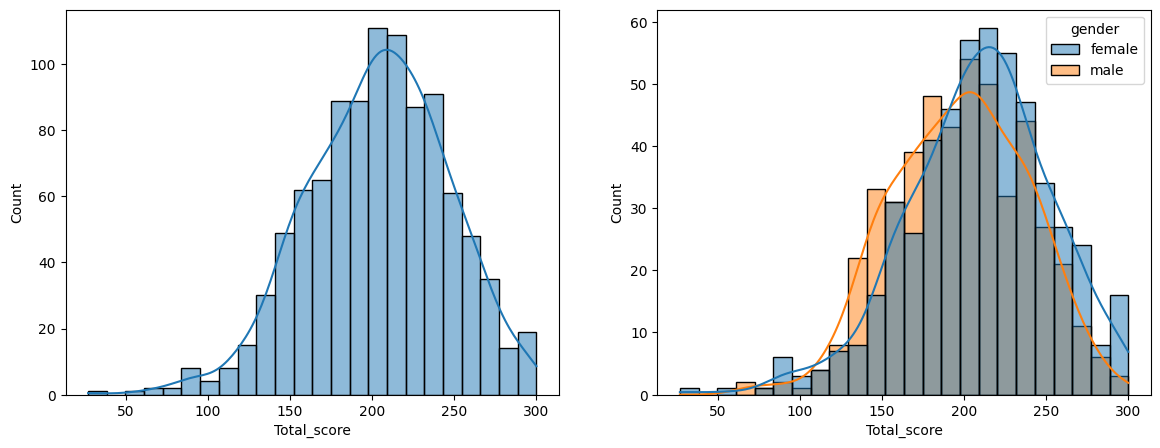

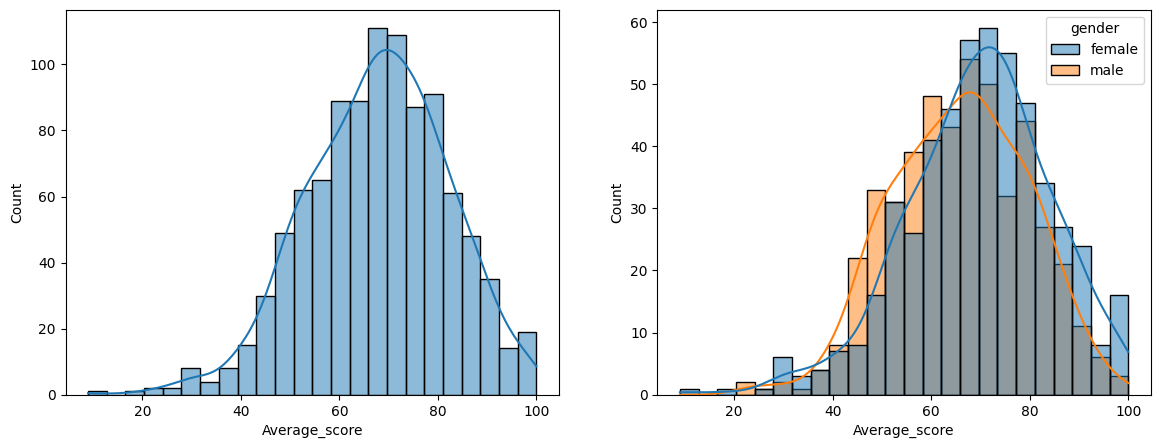

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_1(col):

  plt.figure(figsize=(14,5))

  plt.subplot(1,2,1)
  sns.histplot(df[col],kde=True)

  plt.subplot(1,2,2)
  sns.histplot(data=df,x=col,kde=True,hue='gender')

  plt.show()

plot_1('Total_score')
plot_1('Average_score')

# **Insights**
* It is clear from the graphs that female students perform better than male students

In [ ]:
import plotly.graph_objects as go

categories=df['lunch'].unique()
values1=df[df['gender']=='male']['lunch'].value_counts()
values2=df[df['gender']=='female']['lunch'].value_counts()

trace1=go.Bar(
    x=categories,
    y=values1,
    name='Male',
    marker_color='blue',
    width=0.4
)

trace2=go.Bar(
    x=categories,
    y=values2,
    name='Female',
    marker_color='green',
    width=0.4
)

layout=go.Layout(
    title='Type of lunch done by male and female student',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='Values'),
    barmode='group',
    width=800,
    height=500
)

fig=go.Figure(data=[trace1,trace2],layout=layout)

fig.show()

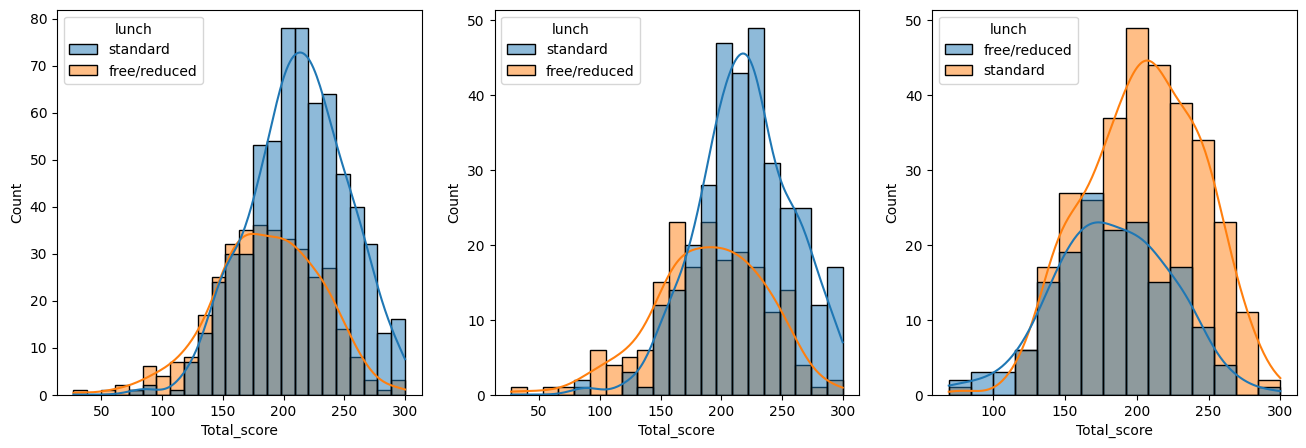

In [ ]:
def plot_2(col):
  plt.figure(figsize=(16,5))
  plt.subplot(1,3,1)
  sns.histplot(data=df,x='Total_score',kde=True,hue=col)

  plt.subplot(1,3,2)
  sns.histplot(data=df[df['gender']=='female'],x='Total_score',kde=True,hue=col)

  plt.subplot(1,3,3)
  sns.histplot(data=df[df['gender']=='male'],x='Total_score',kde=True,hue=col)

  plt.show()
plot_2('lunch')

# **Insights**
* standard lunch is beneficial
* it gives benefit for both male and female students

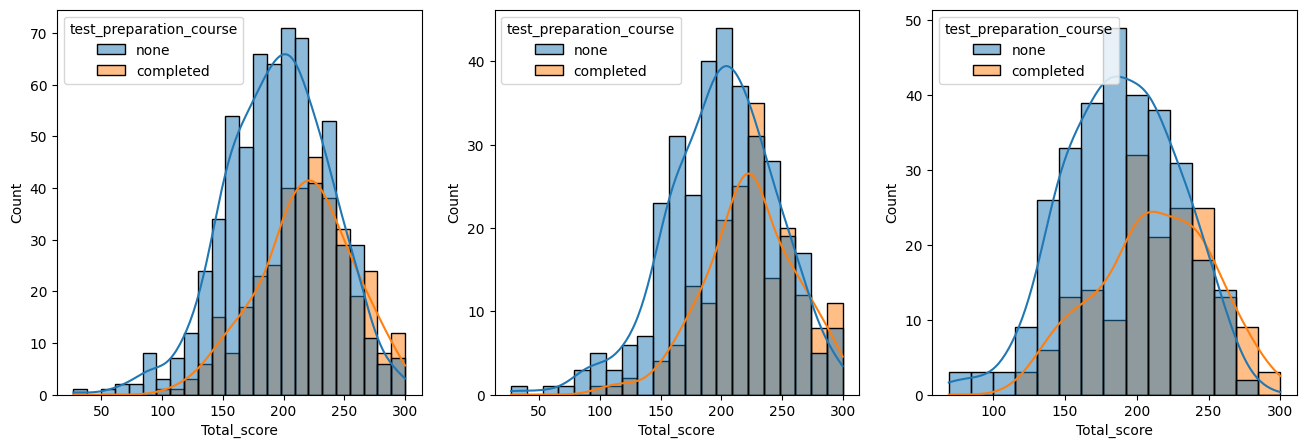

In [ ]:
plot_2('test_preparation_course')

In [99]:
df.groupby('test_preparation_course')['Total_score'].mean()

,Total_score
test_preparation_course,
completed,218.008380
none,195.116822


# **Insights**
* test preparation course seem to be useful for exam as total score is more for the one who did the course

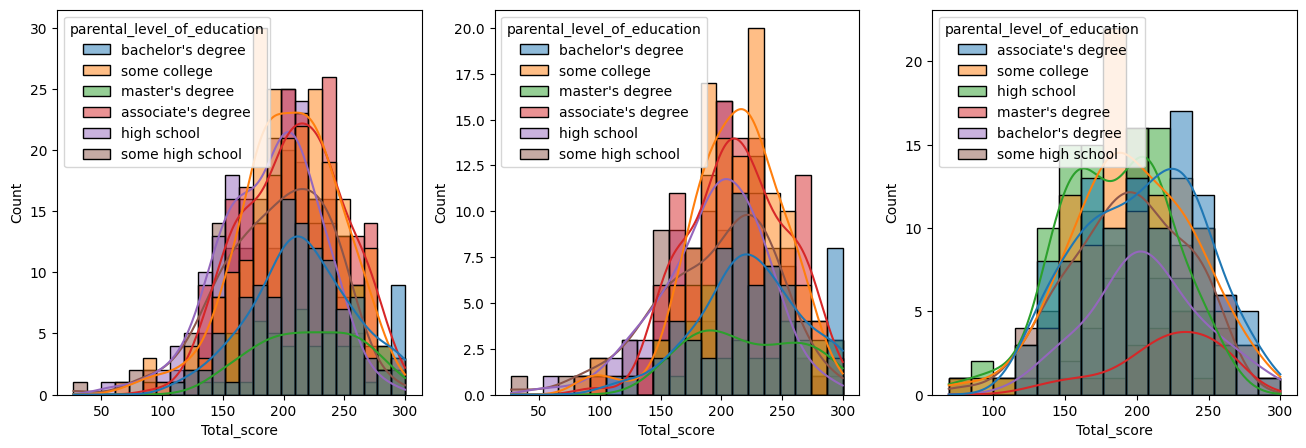

In [ ]:
plot_2('parental_level_of_education')

In [105]:
df.groupby(['parental_level_of_education'])['Total_score'].mean().sort_values(ascending=False)

,Total_score
parental_level_of_education,
master's degree,220.796610
bachelor's degree,215.771186
associate's degree,208.707207
some college,205.429204
some high school,195.324022
high school,189.290816


In [ ]:
df.groupby(['parental_level_of_education','gender'])['Total_score'].mean()

parental_level_of_education  gender
associate's degree           female    213.370690
                             male      203.603774
bachelor's degree            female    224.015873
                             male      206.327273
high school                  female    194.244681
                             male      184.725490
master's degree              female    220.944444
                             male      220.565217
some college                 female    213.008475
                             male      197.148148
some high school             female    196.692308
                             male      193.909091
Name: Total_score, dtype: float64

# **Insights**
* Students whose are parents have done master's degree tend to perform better irrespective of gender
* Students whose are parents have done high school tend to perform poor irrespective of gender

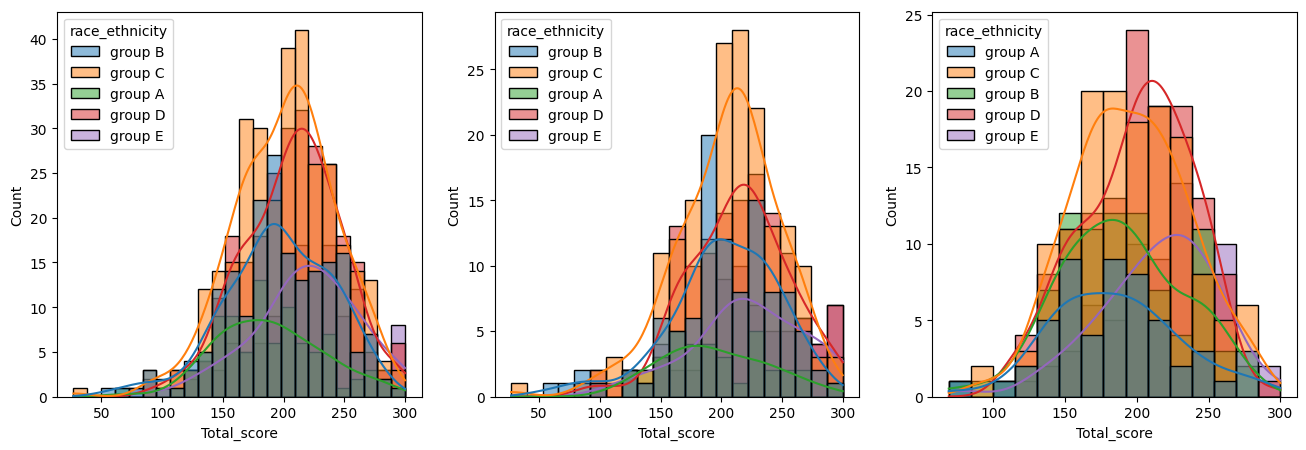

In [ ]:
plot_2('race_ethnicity')

In [ ]:
df.groupby(['race_ethnicity','gender'])['Total_score'].mean()

race_ethnicity  gender
group A         female    195.388889
                male      184.622642
group B         female    202.528846
                male      189.000000
group C         female    205.755556
                male      195.748201
group D         female    214.317829
                male      200.962406
group E         female    222.188406
                male      214.436620
Name: Total_score, dtype: float64

# **Insights**
* Students of group A and B perform poorly
* Students of group A and B's performance is very poor irrespective of gender

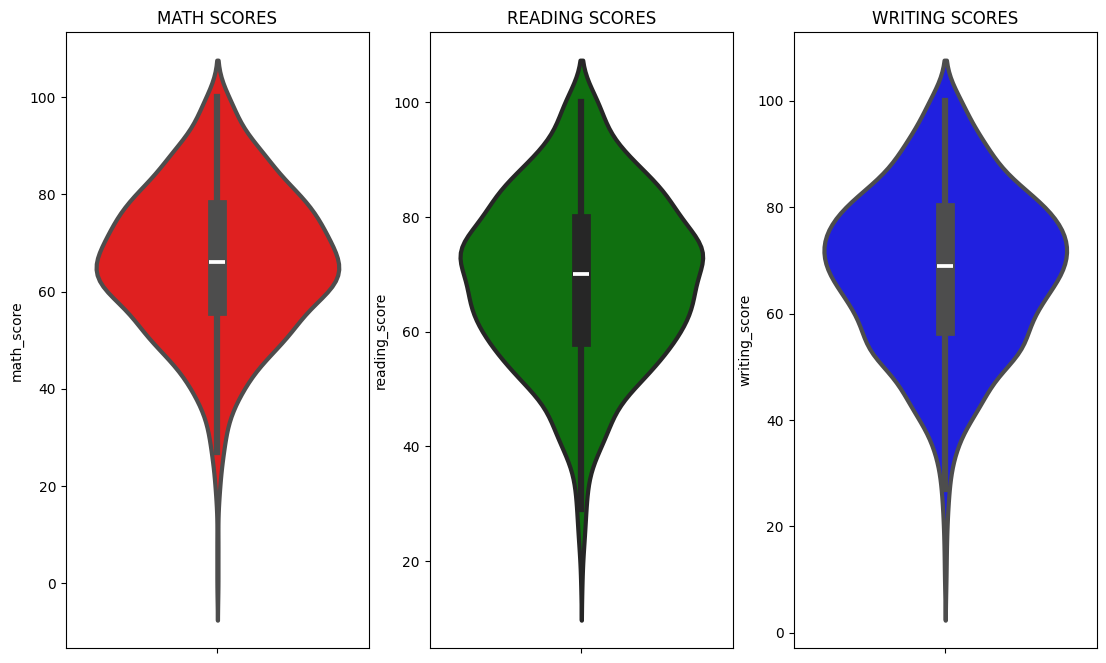

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

# **Insights**
* most of the students have scored 60 to 80 in maths and 50 to 80 in reading and writing

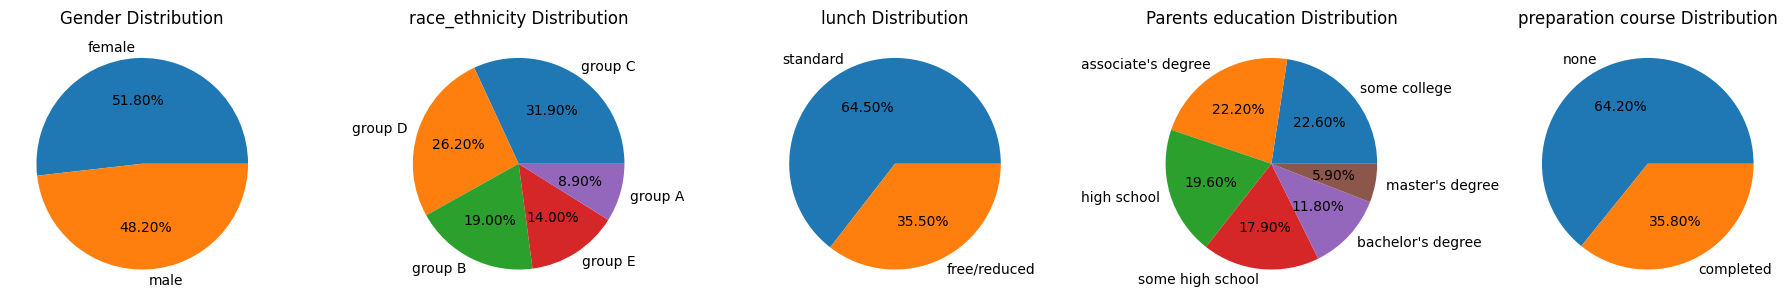

In [109]:
plt.figure(figsize=(18,8))
plt.subplot(1,5,1)
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.axis('off')

plt.subplot(1,5,2)
plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.2f%%')
plt.title('race_ethnicity Distribution')
plt.axis('off')

plt.subplot(1,5,3)
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%1.2f%%')
plt.title('lunch Distribution')
plt.axis('off')

plt.subplot(1,5,4)
plt.pie(df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%1.2f%%')
plt.title('Parents education Distribution')
plt.axis('off')

plt.subplot(1,5,5)
plt.pie(df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,autopct='%1.2f%%')
plt.title('preparation course Distribution')

plt.tight_layout()
plt.grid()
plt.show()

# **Insights**
* Male and female students are approximately same.
* Around 64% prefer standard lunch.
* Around 64% have not completed the test preparation course.
* Group A have minimum number of students(8.9%) and group C have maximum students(31.9%).
* Very less parents have done master's degree(5.9%), around 36% have been to high school only.

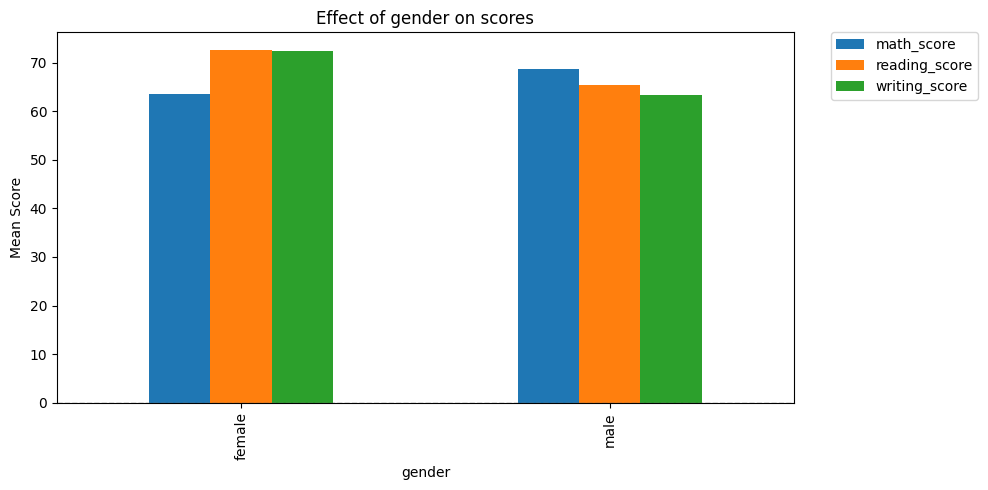


--------------------------------------------------------------------------------------------------------------------------------------------



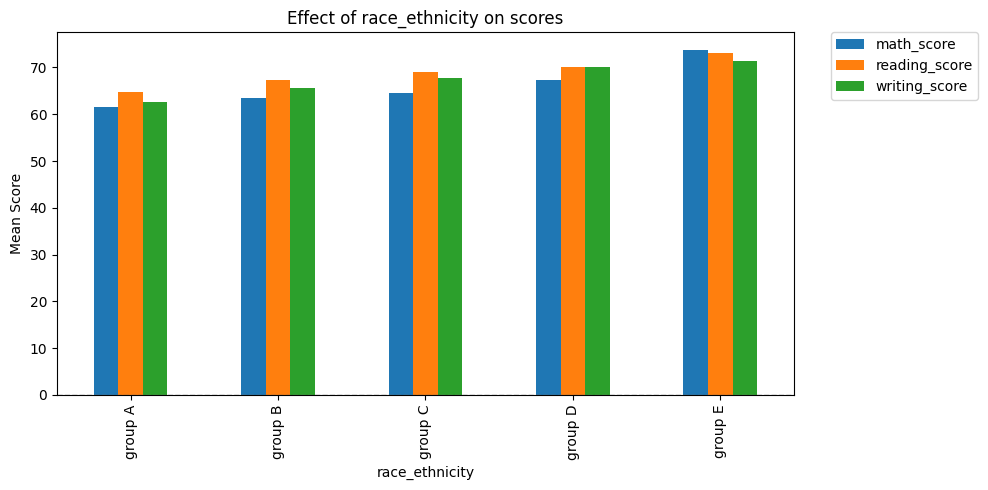


--------------------------------------------------------------------------------------------------------------------------------------------



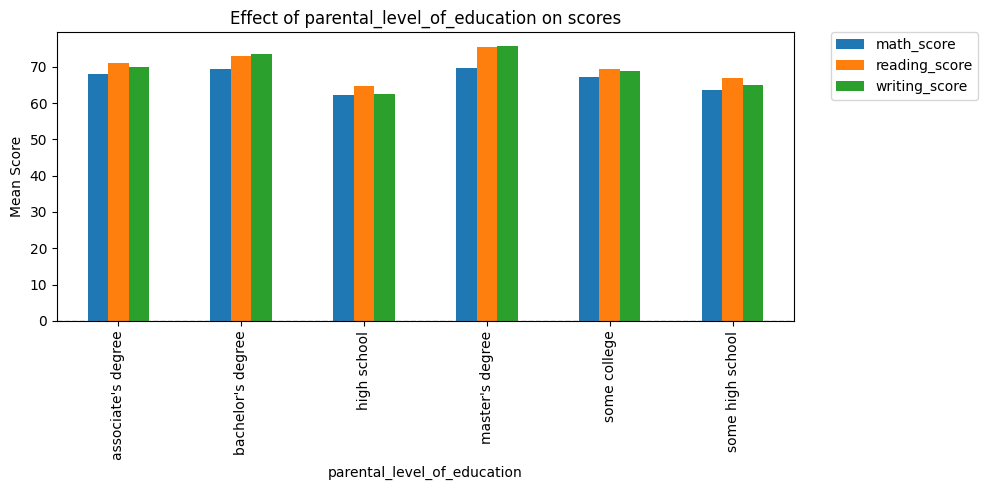


--------------------------------------------------------------------------------------------------------------------------------------------



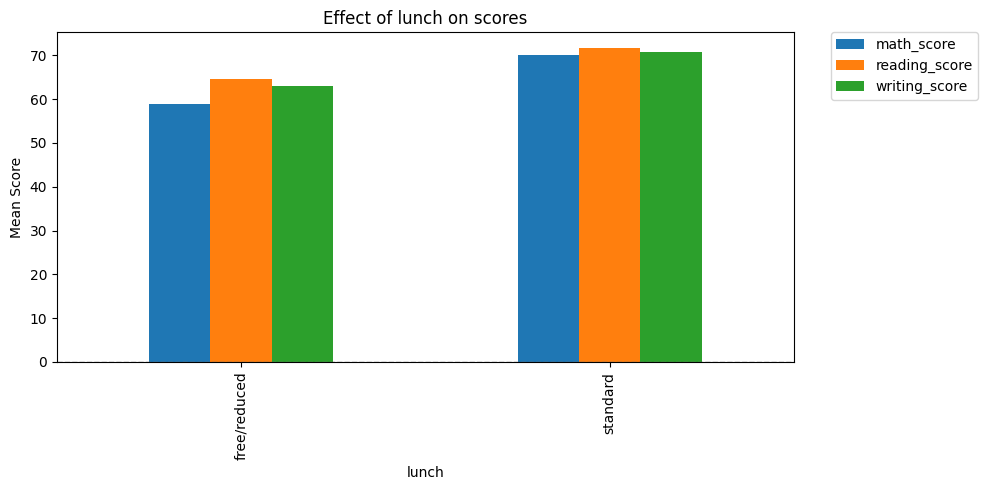


--------------------------------------------------------------------------------------------------------------------------------------------



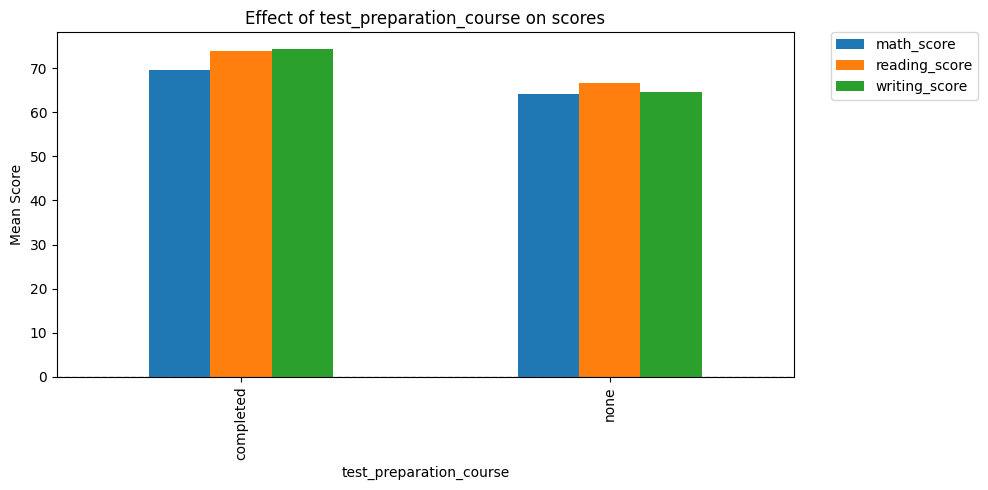


--------------------------------------------------------------------------------------------------------------------------------------------



In [111]:
for col in cat_cols:
  df.groupby(col)[['math_score','reading_score','writing_score']].mean().plot(kind='bar',figsize=(10,5))
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title(f'Effect of {col} on scores')
  plt.xlabel(col)
  plt.ylabel('Mean Score')
  plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
  plt.tight_layout()
  plt.show()
  print("\n" + "--"*70 + "\n")

# **Insights**

**GENDER**
* females score is less in maths as compared to reading and writing but males score more marks in math

**GROUP**
* Group E students performance is good in all subjects whereas group A performance is poor in all subjects as compared to other groups

**PARENT EDUCATION**
* students whose parents have bachelor degree perform good in all subjects, whereas in case of masters students performance is better in reading and writing as compared to maths
* students whose parents have done high school tend to perform poor in all subjects as compared to others

**LUNCH**
* preferring standard lunch yields good performance in all subjects

**PREPARATION COURSE**
* students tend to perform better if they have completed the course

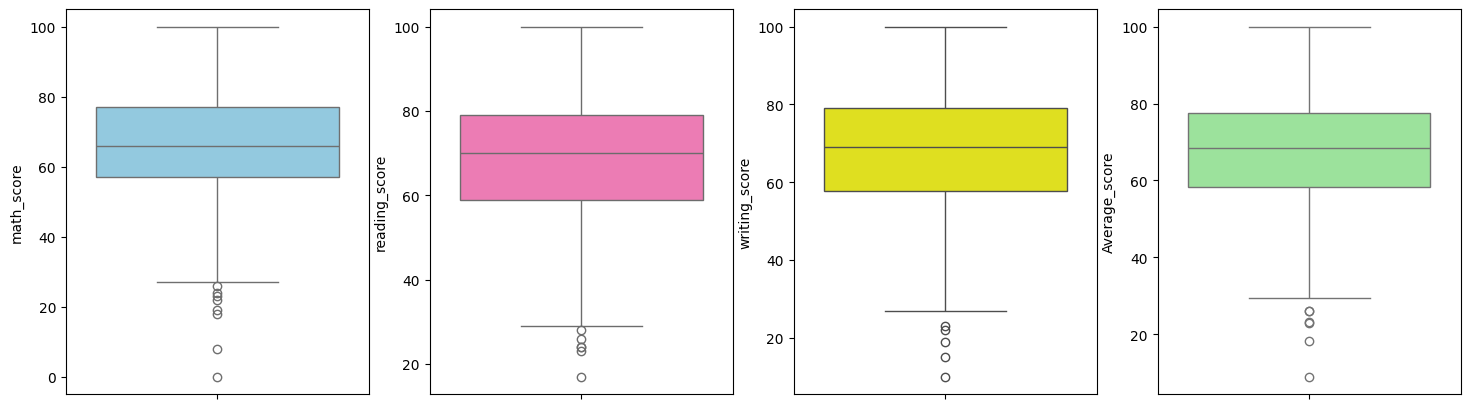

In [102]:
plt.subplots(1,4,figsize=(18,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

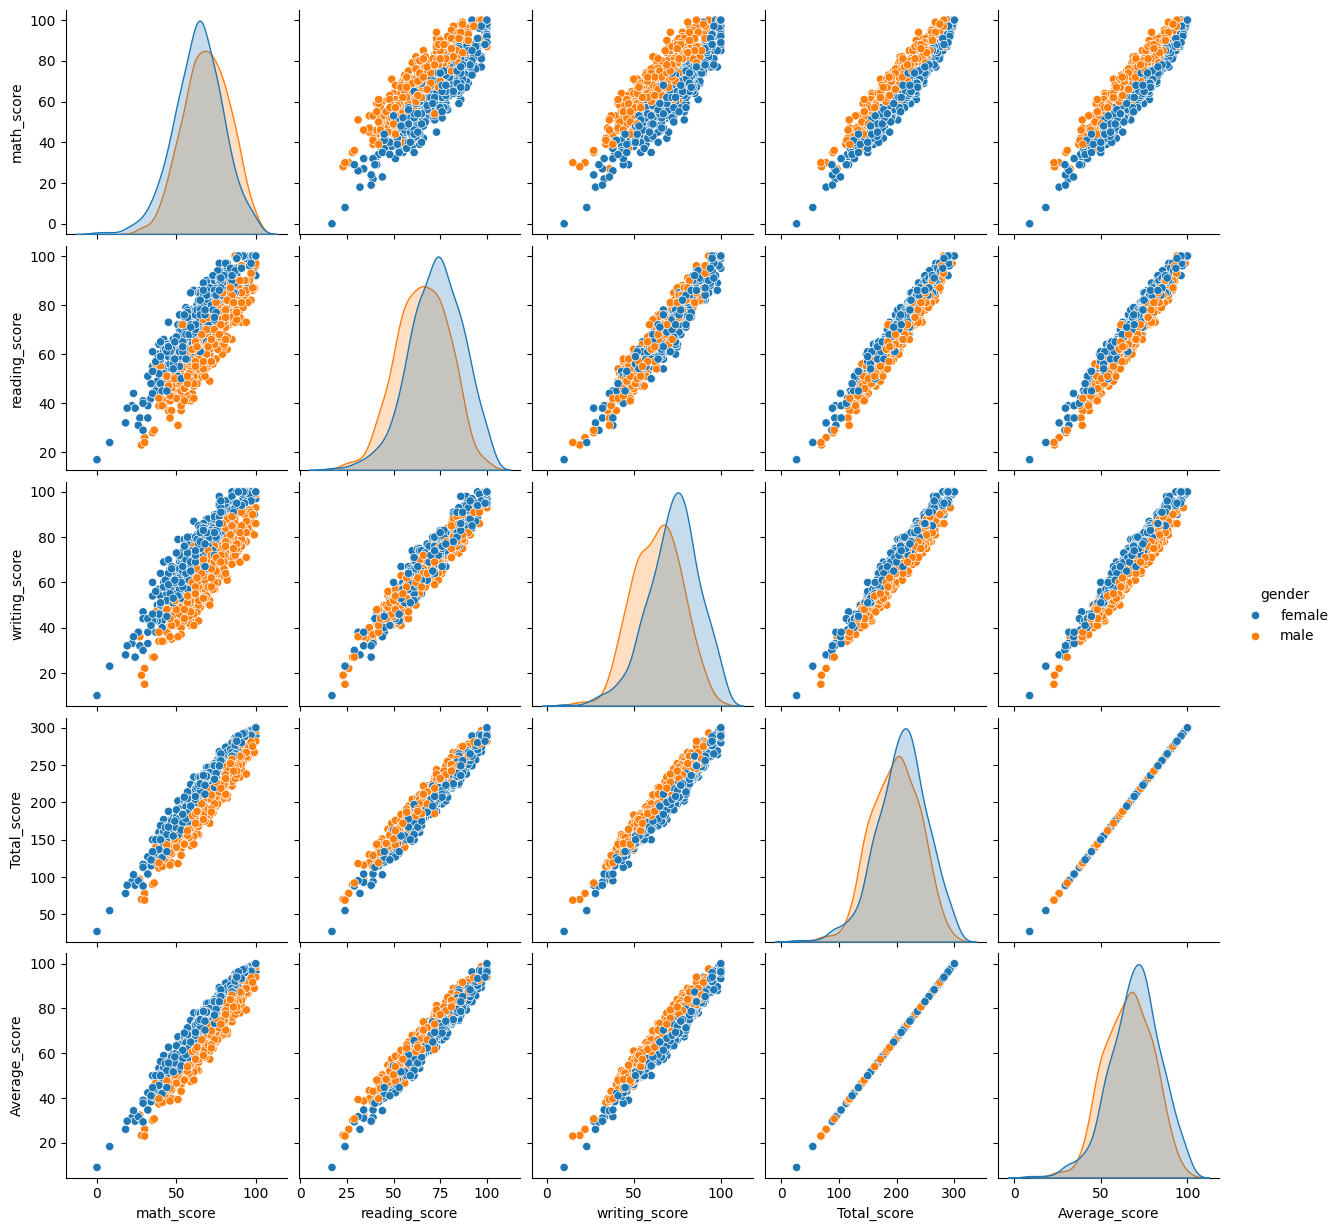

In [103]:
sns.pairplot(df,hue = 'gender')
plt.show()

# **Insights**
* there is a linear relationship between different scores